In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from random import sample

In [2]:
# Returns a set after binary mapping
def GetSet(w, x):
    setW = []
    for i in range(0,len(x)):
        if x[i] == 1:
            setW.append(w[i])
    return setW

# Get the solution of coin row problem
def CoinRow(C):

    C = [0] + C
    n = len(C) 
    F = np.zeros(n, dtype=int)
    pick = np.zeros(n, dtype=int)
    
    F[1] = C[1]
    pick[1] = 1
    
    for i in range(2,n):
        if C[i] + F[i-2] > F[i-1]:
            F[i] = C[i] + F[i-2]
            pick[i] = 1
            pick[i-1] = 0
        else:
            F[i] = F[i-1]
            pick[i-1] = 1
            pick[i-2] = 0
    
    for i in range(1,len(pick)-1):
        if(pick[i-1] == 0 and pick [i+1] == 0):
            pick[i] = 1
        
    print(GetSet(C,pick))
    print(F[-1])

#Change Making problem with Dynamic programming solution
def DynamicChangeMaking(D, n, print_text = False):
    
    F = [0] + [float('inf')] * n
    
    iterations = 0

    for i in range(len(D)):
        for j in range(D[i],n+1):
            iterations += 1
            if F[j-D[i]]+1 < F[j]: 
                F[j] = F[j-D[i]] + 1 
    
    if print_text:
        print("The minimum amount of coins is: " + str(F[-1]))
        
    return iterations

#Change Making problem with a greedy solution
def GreedyChangeMaking(D, n, print_text = False):
    
    coins = []
    
    iterations = 0
    
    for i in range(len(D)-1, -1, -1):
        iterations += 1
        while n - D[i] >= 0:
            coins.append(D[i])
            n = n - D[i]
    
    if print_text:
        print(coins)
        print("The minimum amount of coins is: " + str(len(coins)))
        
    return iterations

In [3]:
c = [1,2,5,10,20,1,2,3,5,4,2]
CoinRow(c)

[1, 5, 20, 2, 5, 2]
35


In [4]:
c = [1,2,5]
GreedyChangeMaking(c, 17, True)

[5, 5, 5, 2]
The minimum amount of coins is: 4


3

In [5]:
c = [1,2,5]
DynamicChangeMaking(c, 17, True)

The minimum amount of coins is: 4


46

In [6]:
samples = 100                        # Quantity of samples to be averaged
x = [10, 20, 30, 40, 50]             # Different input sizes
dynamic_change = []                  # Quantity of iterations - Dynamic Change making
greedy_change = []                   # Quantity of iterations - Simple Change making
Coin_row = [1,2,5,10,20,1,2,3,5,4,2] # Array for Coin Row problem
Changes = [1,2,5]                    # Array of changes for Change Making problem

In [7]:
# Calculate the iterations of all approaches
for i in range(len(x)):
    
    it1, it2 = 0,0
    
    for j in range (1,samples):
        
        data = random.sample(range(0, x[i]*3), x[i]+1)
        data.sort()
        data = [1] + data[2:]
        
        it1 = it1 + DynamicChangeMaking(data, random.randint(x[i]*5,x[i]*100))
        it2 = it2 + GreedyChangeMaking(data, random.randint(x[i]*5,x[i]*100))
        
    dynamic_change.append(it1/samples)
    greedy_change.append(it2/samples)

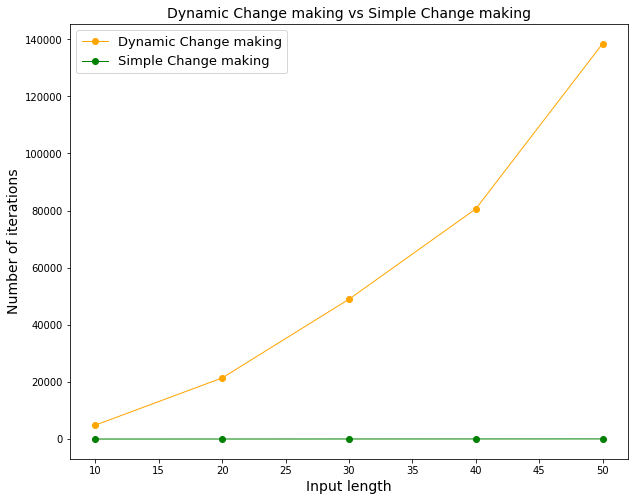

In [9]:
# Plots the complexity graph
plt.figure(figsize=(10, 8))
plt.plot(x,dynamic_change, c="orange", ls="-", lw = 1, marker="o", label="Dynamic Change making")
plt.plot(x,greedy_change, c="green", ls="-",  lw = 1, marker="o", label="Simple Change making")
plt.title("Dynamic Change making vs Simple Change making",fontsize=14)
plt.xlabel("Input length",fontsize=14)
plt.ylabel("Number of iterations",fontsize=14)
plt.legend(fontsize=13)
plt.show()